In [93]:
import pandas as pd
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [162]:
airlines = pd.read_excel('E:/DataScience/Assignments/Forecasting/AirlinesData.xlsx')

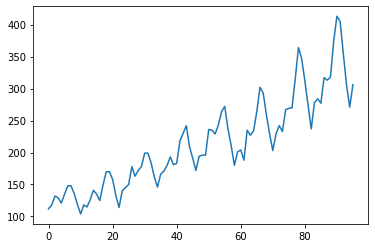

In [163]:
airlines.Passengers.plot()

In [164]:
airlines["Date"] = pd.to_datetime(airlines.Month,format="%b-%y")

In [165]:
airlines["month"] = airlines.Date.dt.strftime("%b")
airlines["year"] = airlines.Date.dt.strftime("%Y")

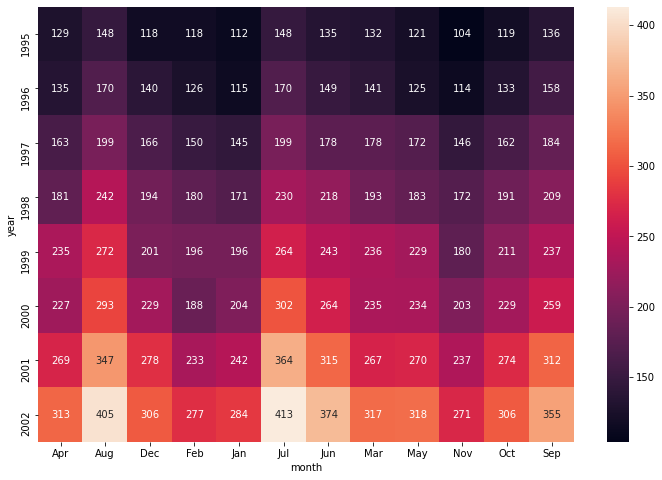

In [166]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

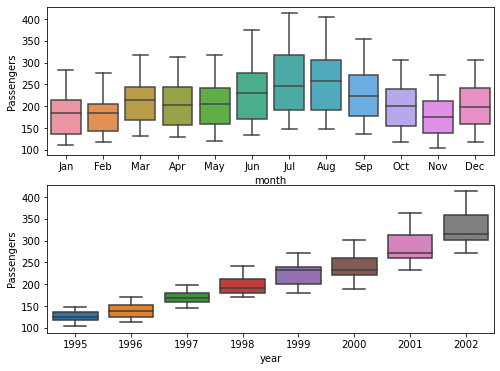

In [167]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=airlines)

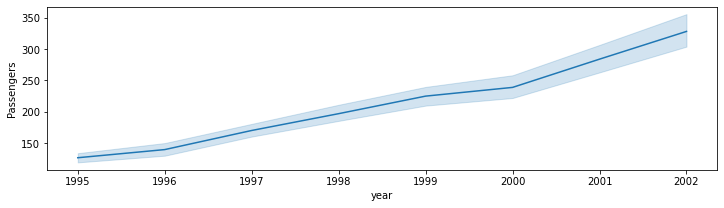

In [168]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=airlines)

In [169]:
airlines['i'] = range(1, len(airlines) + 1)

In [170]:
airlines['log_passenger'] = np.log(airlines.Passengers)

In [171]:
airlines['i_square'] = airlines.i**2

In [172]:
airlines

,Month,Passengers,Date,month,year,i,log_passenger,i_square
0,1995-01-01,112,1995-01-01,Jan,1995,1,4.718499,1
1,1995-02-01,118,1995-02-01,Feb,1995,2,4.770685,4
2,1995-03-01,132,1995-03-01,Mar,1995,3,4.882802,9
3,1995-04-01,129,1995-04-01,Apr,1995,4,4.859812,16
4,1995-05-01,121,1995-05-01,May,1995,5,4.795791,25
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,92,6.003887,8464
92,2002-09-01,355,2002-09-01,Sep,2002,93,5.872118,8649
93,2002-10-01,306,2002-10-01,Oct,2002,94,5.723585,8836
94,2002-11-01,271,2002-11-01,Nov,2002,95,5.602119,9025


In [173]:
airlines=pd.get_dummies(airlines)

In [174]:
airlines

,Month,Passengers,Date,i,log_passenger,i_square,month_Apr,month_Aug,month_Dec,month_Feb,...,month_Oct,month_Sep,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002
0,1995-01-01,112,1995-01-01,1,4.718499,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,2,4.770685,4,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,3,4.882802,9,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1995-04-01,129,1995-04-01,4,4.859812,16,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,5,4.795791,25,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,92,6.003887,8464,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
92,2002-09-01,355,2002-09-01,93,5.872118,8649,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,94,5.723585,8836,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
94,2002-11-01,271,2002-11-01,95,5.602119,9025,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [175]:
Train = airlines.head(60)
Test = airlines.tail(36)

In [183]:
linear_model = smf.ols('Passengers~i',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['i'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

44.35662671788453

In [184]:
Exp = smf.ols("log_passenger~i",data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['i'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.91199647698261

In [185]:
Quad = smf.ols('Passengers~i+i_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["i","i_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

40.31203210939926

In [186]:
add_sea = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

119.97073717276962

In [187]:
add_sea_Quad = smf.ols('Passengers~i+i_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','i','i_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

25.49269369204626

In [189]:
mul_sea = smf.ols('log_passenger~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_mult_sea = pd.Series(mul_sea.predict(Test))
rmse_mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

123.66785534535846

In [190]:
mul_add_sea = smf.ols('log_passenger~i+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(Test))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea

26.100380469558495

In [193]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_mult_sea","rmse_mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,25.492694
6,rmse_mult_add_sea,26.100380
2,rmse_Quad,40.312032
1,rmse_Exp,42.911996
0,rmse_linear,44.356627
3,rmse_add_sea,119.970737
5,rmse_mult_sea,123.667855
